In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
plt.rcParams.update({
        "font.family": "serif",
    })
plt.rcParams['figure.constrained_layout.use'] = True

In [10]:
def plot_file(filename):
    df = pd.read_csv(filename)
    
    split_points = df[df['split'] == 1]
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['InsertTime_us'], label='Insert Time', zorder=1)
    plt.scatter(split_points.index, split_points['InsertTime_us'], color='red', s=10, label='Split', zorder=2)
    plt.xlabel('num_insertions')
    plt.ylabel('time (micro secs)')
    plt.grid(True)
    plt.legend()
    
    output_filename = f"{filename.replace(' ', '_').lower()}_splits.png"
    plt.savefig(output_filename)
    plt.show()
    plt.close()

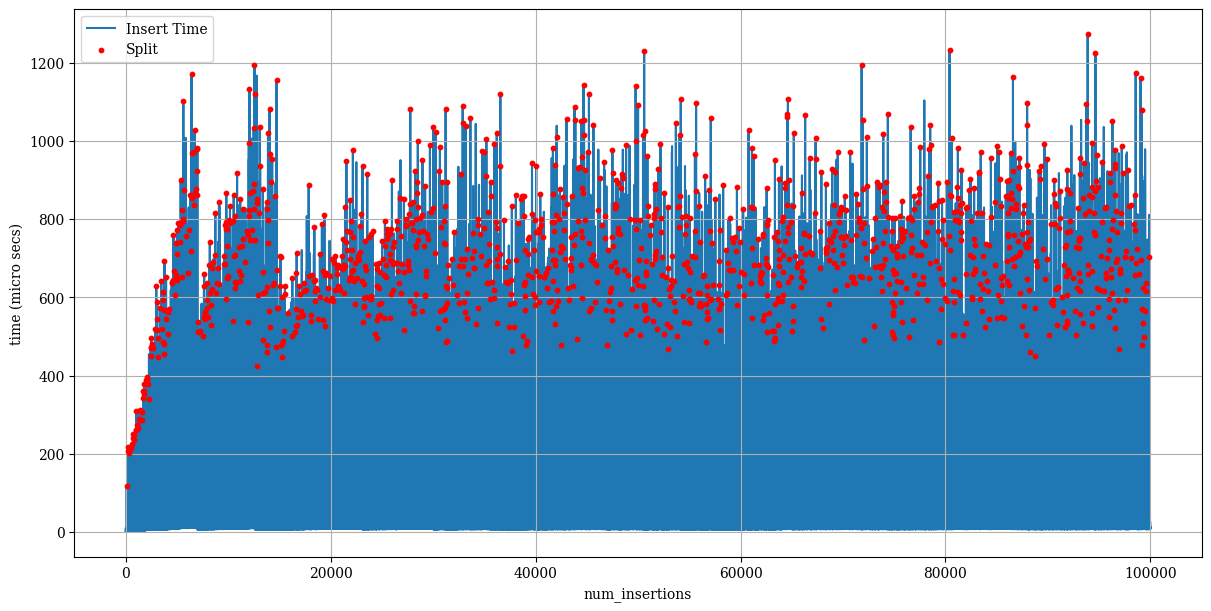

In [11]:
plot_file('../build/in_memory_insertion_times.csv')


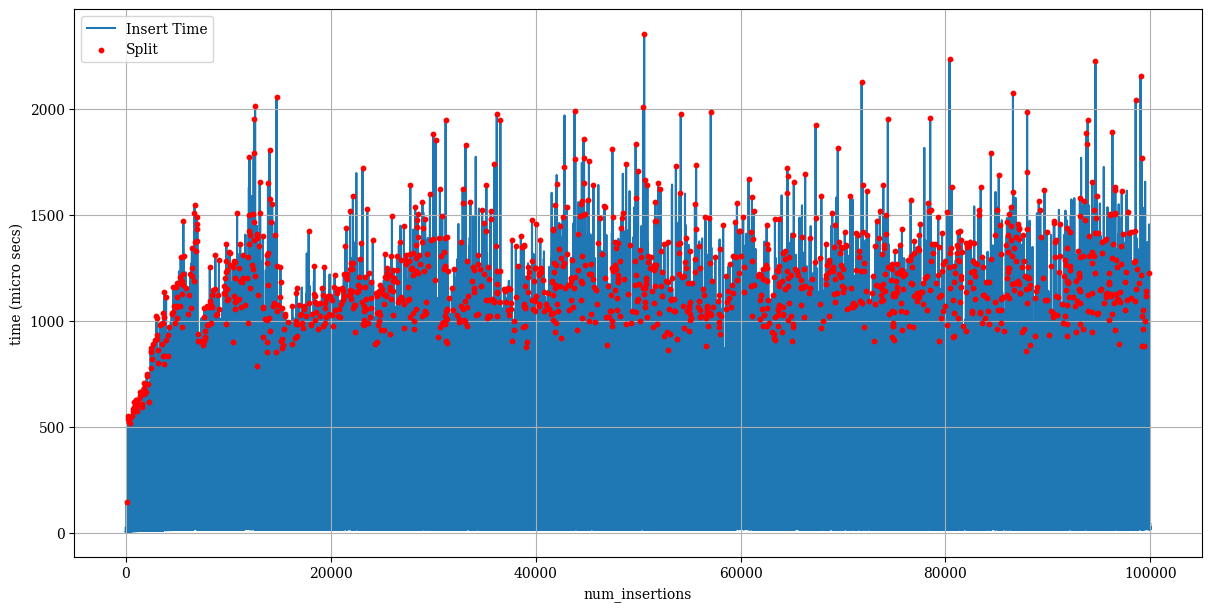

In [12]:
plot_file('../build/on_disk_insertion_times.csv')

In [3]:
filename_mem = '../build/in_memory_M16_fill50.csv'
filename_disk = '../build/on_disk_insertion_times.csv'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [5]:
df = pd.read_csv(filename_mem)
df['normal_split_time'] = df.apply(
    lambda row: row['Time_us'] if (row['DidSplit'] == 1 and row['IsRootSplit'] == 0) else pd.NA,
    axis=1
)
df['root_split_time'] = df.apply(
    lambda row: row['Time_us'] if row['IsRootSplit'] == 1 else pd.NA,
    axis=1
)

Total Insertions: 100000
Total Splits:     8689
Total Root Splits:  4


TypeError: float() argument must be a string or a real number, not 'NAType'

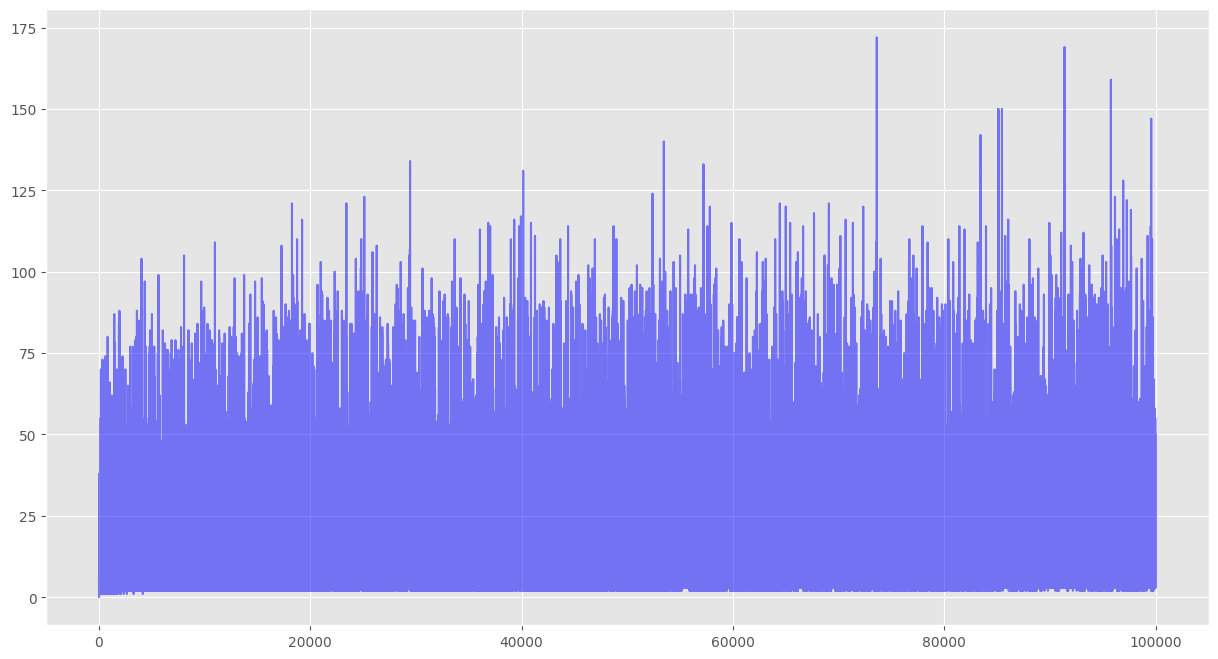

In [7]:
print(f"Total Insertions: {len(df)}")
print(f"Total Splits:     {df['DidSplit'].sum()}")
print(f"Total Root Splits:  {df['IsRootSplit'].sum()}")

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(df.index, df['Time_us'], label='Insertion Time (all)', color='blue', alpha=0.5, zorder=1)

ax.scatter(df.index, df['normal_split_time'], 
           color='orange', 
           s=10,  # Small size
           label='Normal Split', 
           zorder=2)

ax.scatter(df.index, df['root_split_time'], 
           color='red', 
           marker='x',
           s=100,
           label='Root Split (Tree Grew)', 
           zorder=3)

ax.set_title(f'Insertion Performance Analysis: {filename}', fontsize=18)
ax.set_xlabel('Insertion Sequence (InsertIdx)', fontsize=12)
ax.set_ylabel('Time (microseconds) - Log Scale', fontsize=12)
ax.legend()
ax.grid(True)

ax.set_yscale('log')

ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

plt.tight_layout()
plt.show()

Loading data from ../build/on_disk_M16_fill50.csv...
Total Insertions: 100000
Total Splits:     8689
Total Root Splits:  4


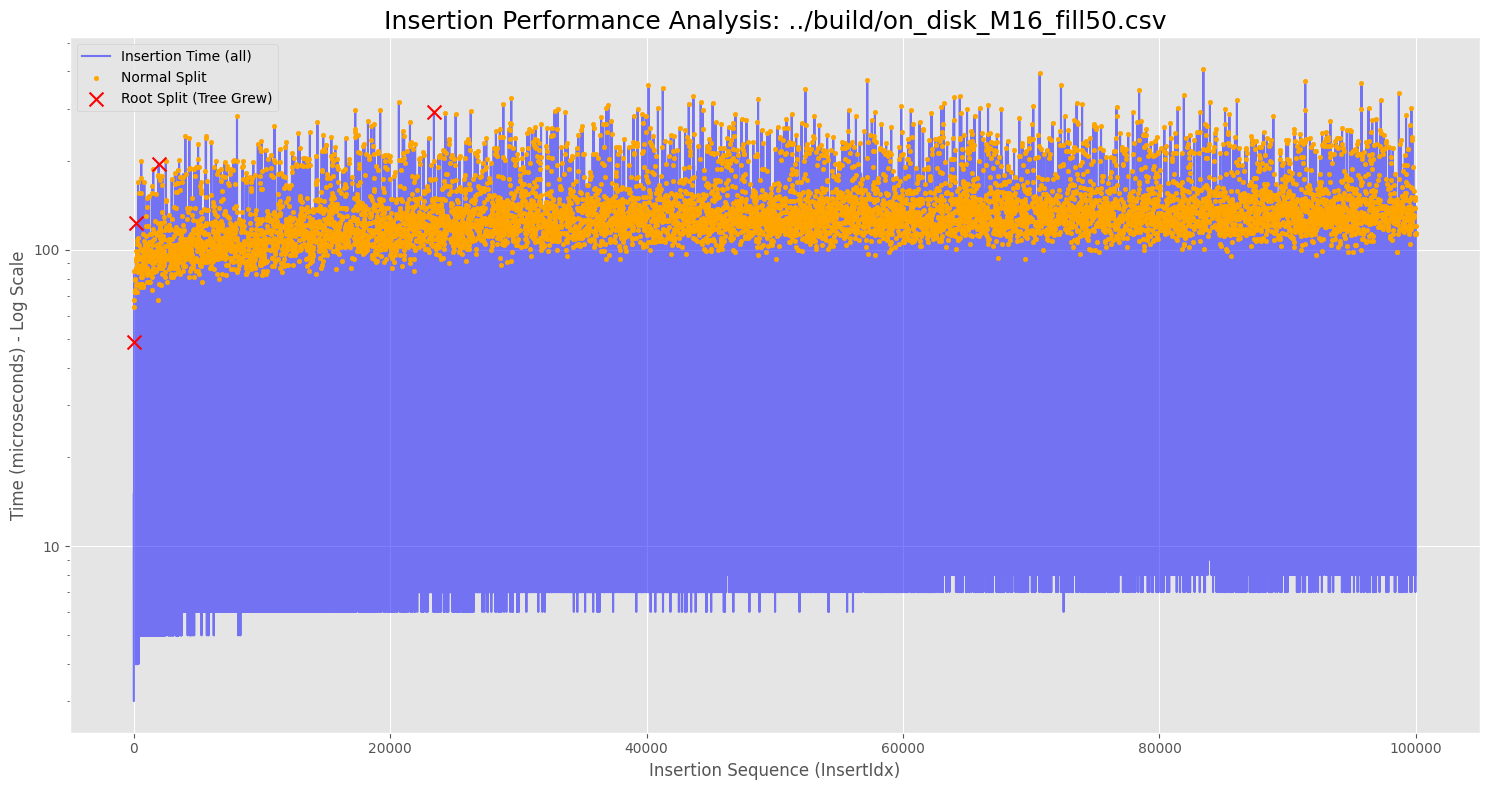

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# --- Configuration ---
# Change this to the CSV file you want to analyze
filename = '../build/on_disk_M16_fill50.csv'
# ---------------------

print(f"Loading data from {filename}...")
df = pd.read_csv(filename)

# --- 1. Data Preparation (This part is correct) ---
df['normal_split_time'] = df.apply(
    lambda row: row['Time_us'] if (row['DidSplit'] == 1 and row['IsRootSplit'] == 0) else pd.NA,
    axis=1
)
df['root_split_time'] = df.apply(
    lambda row: row['Time_us'] if row['IsRootSplit'] == 1 else pd.NA,
    axis=1
)

# --- 2. Your Analysis (This part is correct) ---
print(f"Total Insertions: {len(df)}")
print(f"Total Splits:     {df['DidSplit'].sum()}")
print(f"Total Root Splits:  {df['IsRootSplit'].sum()}")

# --- 3. Plotting (This is the fixed part) ---
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15, 8))

# Plot 1: The main, underlying insertion time
ax.plot(df.index, df['Time_us'], label='Insertion Time (all)', color='blue', alpha=0.5, zorder=1)

# --- FIX IS HERE ---
# Create small DataFrames that *only* contain the rows we want to plot
normal_splits_df = df[df['normal_split_time'].notna()]
root_splits_df = df[df['root_split_time'].notna()]

# Plot 2: Scatter plot for Normal Splits (using the filtered DataFrame)
ax.scatter(normal_splits_df.index, normal_splits_df['normal_split_time'], 
           color='orange', 
           s=10,  # Small size
           label='Normal Split', 
           zorder=2)

# Plot 3: Scatter plot for Root Splits (using the filtered DataFrame)
ax.scatter(root_splits_df.index, root_splits_df['root_split_time'], 
           color='red', 
           marker='x',
           s=100,
           label='Root Split (Tree Grew)', 
           zorder=3)
# --- END FIX ---

# --- 4. Formatting (This part is correct) ---
ax.set_title(f'Insertion Performance Analysis: {filename}', fontsize=18)
ax.set_xlabel('Insertion Sequence (InsertIdx)', fontsize=12)
ax.set_ylabel('Time (microseconds) - Log Scale', fontsize=12)
ax.legend()
ax.grid(True)

ax.set_yscale('log')
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

plt.tight_layout()
plt.show()